# Descriptive and Explanatory Analysis

Data: kunnat.xlsx
https://docs.google.com/spreadsheets/d/1Qk65y6mw4LL75ft7kfmS7d0vd0rCBtFk/edit?usp=sharing&ouid=101295700407741665228&rtpof=true&sd=true

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [2]:
df = pd.read_csv("kunnat.xlsx - Kuntien avainluvut.csv")
df.head()

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021","Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021","Perheiden lukumäärä, 2020","Asuntokuntien lukumäärä, 2021","Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2021","Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2020","Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020","Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020","Alueella asuvan työllisen työvoiman määrä, 2020","Työllisyysaste, %, 2020","Asuinkunnassaan työssäkäyvien osuus, %, 2020","Työttömien osuus työvoimasta, %, 2020","Eläkeläisten osuus väestöstä, %, 2020","Taloudellinen huoltosuhde, 2020","Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,"87,9",16467,"0,5","16,3","58,9","24,8","0,2","1,9",−15,64,4521,7931,"72,2","22,2","71,1","25,5",6571,"71,5","43,8","12,7","27,8","149,4",4432,"3,1","33,8","61,4","67,4","1066,9","3199,6","4623,2","1801,7","3252,7"
1,Alajärvi,"61,6",9311,"−1,1","16,9","53,5","29,5","0,1","2,7",−45,−93,2577,4076,"91,9","17,7","67,9","22,3",3301,"67,9","75,4","12,1","33,3","185,3",3302,"11,5","27,2","59,4","100,0","599,7","2942,5","5437,3","2322,5","4142,8"
2,Alavieska,"51,6",2491,"−1,0","19,4","54,9","25,7","0,2","0,6",−6,−27,666,1088,"97,9","19,8","69,4","18,7",976,"73,6","45,4","11,3","29,0","157,9",704,"22,4","21,3","54,4","72,1","783,1","3973,0","4469,2","2028,2","4153,8"
3,Alavus,"60,8",11197,"−1,2","16,4","53,9","29,7","0,1","1,3",−70,−68,3071,5244,"86,3","22,5","67,6","19,9",4206,"70,7","75,8","9,7","33,0","169,4",4056,"9,0","21,0","68,5","96,4","456,8","4029,7","7135,7","1990,8","4354,0"
4,Asikkala,"65,0",8033,"−0,3","13,3","52,4","34,3","0,2","1,9",−72,27,2313,3996,"77,3","20,6","70,4","27,0",2872,"70,4","49,3","12,1","37,9","180,6",2282,"8,6","30,7","57,9","79,5","1072,8","241,3","1623,5","1752,7","3559,3"


In [3]:
df.shape

(309, 33)

## Prepare data

In [4]:
# rename columns (translate to English)
new_column_names = [
    "municipality",
    "town_area_rate_2020",
    "population_2021",
    "population_change_2021",
    "under_15_pct_2021",
    "age_15_64_pct_2021",
    "over_64_pct_2021",
    "swedish_speakers_pct_2021",
    "foreign_citizens_pct_2021",
    "natural_population_increase_2021",
    "net_migration_2021",
    "num_families_2020",
    "num_households_2021",
    "row_detached_households_pct_2021",
    "rental_households_pct_2020",
    "secondary_education_pct_2020",
    "higher_education_pct_2020",
    "employed_residents_2020",
    "employment_rate_2020",
    "work_in_home_municipality_pct_2020",
    "unemployment_rate_2020",
    "retirees_pct_2020",
    "economic_dependency_ratio_2020",
    "num_jobs_2020",
    "primary_production_jobs_pct_2020",
    "manufacturing_jobs_pct_2020",
    "service_jobs_pct_2020",
    "employment_self_sufficiency_2020",
    "annual_margin_eur_per_capita_2020",
    "debt_eur_per_capita_2020",
    "municipal_debt_eur_per_capita_2020",
    "education_culture_costs_eur_per_capita_2020",
    "social_health_costs_eur_per_capita_2020"
]
df.columns = new_column_names
df.head()

,municipality,town_area_rate_2020,population_2021,population_change_2021,under_15_pct_2021,age_15_64_pct_2021,over_64_pct_2021,swedish_speakers_pct_2021,foreign_citizens_pct_2021,natural_population_increase_2021,net_migration_2021,num_families_2020,num_households_2021,row_detached_households_pct_2021,rental_households_pct_2020,secondary_education_pct_2020,higher_education_pct_2020,employed_residents_2020,employment_rate_2020,work_in_home_municipality_pct_2020,unemployment_rate_2020,retirees_pct_2020,economic_dependency_ratio_2020,num_jobs_2020,primary_production_jobs_pct_2020,manufacturing_jobs_pct_2020,service_jobs_pct_2020,employment_self_sufficiency_2020,annual_margin_eur_per_capita_2020,debt_eur_per_capita_2020,municipal_debt_eur_per_capita_2020,education_culture_costs_eur_per_capita_2020,social_health_costs_eur_per_capita_2020
0,Akaa,"87,9",16467,"0,5","16,3","58,9","24,8","0,2","1,9",−15,64,4521,7931,"72,2","22,2","71,1","25,5",6571,"71,5","43,8","12,7","27,8","149,4",4432,"3,1","33,8","61,4","67,4","1066,9","3199,6","4623,2","1801,7","3252,7"
1,Alajärvi,"61,6",9311,"−1,1","16,9","53,5","29,5","0,1","2,7",−45,−93,2577,4076,"91,9","17,7","67,9","22,3",3301,"67,9","75,4","12,1","33,3","185,3",3302,"11,5","27,2","59,4","100,0","599,7","2942,5","5437,3","2322,5","4142,8"
2,Alavieska,"51,6",2491,"−1,0","19,4","54,9","25,7","0,2","0,6",−6,−27,666,1088,"97,9","19,8","69,4","18,7",976,"73,6","45,4","11,3","29,0","157,9",704,"22,4","21,3","54,4","72,1","783,1","3973,0","4469,2","2028,2","4153,8"
3,Alavus,"60,8",11197,"−1,2","16,4","53,9","29,7","0,1","1,3",−70,−68,3071,5244,"86,3","22,5","67,6","19,9",4206,"70,7","75,8","9,7","33,0","169,4",4056,"9,0","21,0","68,5","96,4","456,8","4029,7","7135,7","1990,8","4354,0"
4,Asikkala,"65,0",8033,"−0,3","13,3","52,4","34,3","0,2","1,9",−72,27,2313,3996,"77,3","20,6","70,4","27,0",2872,"70,4","49,3","12,1","37,9","180,6",2282,"8,6","30,7","57,9","79,5","1072,8","241,3","1623,5","1752,7","3559,3"


In [5]:
df.describe()

,population_2021,num_families_2020,num_households_2021,employed_residents_2020,num_jobs_2020
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,17955.472492,4749.686084,9040.893204,7393.763754,7393.737864
std,50084.667410,12515.958602,26106.129170,22296.007900,27126.461941
min,105.000000,26.000000,59.000000,42.000000,22.000000
25%,2673.000000,725.000000,1319.000000,963.000000,807.000000
50%,5967.000000,1615.000000,2755.000000,2271.000000,1849.000000
75%,14643.000000,4022.000000,6470.000000,5655.000000,4648.000000
max,658457.000000,161282.000000,347146.000000,301908.000000,398042.000000


In [6]:
# some columns are objects (instead of floats) because of incorrect formatting
df.dtypes

municipality                                   object
town_area_rate_2020                            object
population_2021                                 int64
population_change_2021                         object
under_15_pct_2021                              object
age_15_64_pct_2021                             object
over_64_pct_2021                               object
swedish_speakers_pct_2021                      object
foreign_citizens_pct_2021                      object
natural_population_increase_2021               object
net_migration_2021                             object
num_families_2020                               int64
num_households_2021                             int64
row_detached_households_pct_2021               object
rental_households_pct_2020                     object
secondary_education_pct_2020                   object
higher_education_pct_2020                      object
employed_residents_2020                         int64
employment_rate_2020        

In [7]:
def convert_object_columns(df):
    for col in df.select_dtypes(include=['object']).columns:
        if col != "municipality":
            df[col] = df[col].str.replace(',', '.').str.replace('−', '-').astype(float)
    return df

In [8]:
df = convert_object_columns(df)
df.dtypes

municipality                                    object
town_area_rate_2020                            float64
population_2021                                  int64
population_change_2021                         float64
under_15_pct_2021                              float64
age_15_64_pct_2021                             float64
over_64_pct_2021                               float64
swedish_speakers_pct_2021                      float64
foreign_citizens_pct_2021                      float64
natural_population_increase_2021               float64
net_migration_2021                             float64
num_families_2020                                int64
num_households_2021                              int64
row_detached_households_pct_2021               float64
rental_households_pct_2020                     float64
secondary_education_pct_2020                   float64
higher_education_pct_2020                      float64
employed_residents_2020                          int64
employment

## Data Analysis

In [9]:
# statistical key figures
df.describe()

,town_area_rate_2020,population_2021,population_change_2021,under_15_pct_2021,age_15_64_pct_2021,over_64_pct_2021,swedish_speakers_pct_2021,foreign_citizens_pct_2021,natural_population_increase_2021,net_migration_2021,num_families_2020,num_households_2021,row_detached_households_pct_2021,rental_households_pct_2020,secondary_education_pct_2020,higher_education_pct_2020,employed_residents_2020,employment_rate_2020,work_in_home_municipality_pct_2020,unemployment_rate_2020,retirees_pct_2020,economic_dependency_ratio_2020,num_jobs_2020,primary_production_jobs_pct_2020,manufacturing_jobs_pct_2020,service_jobs_pct_2020,employment_self_sufficiency_2020,annual_margin_eur_per_capita_2020,debt_eur_per_capita_2020,municipal_debt_eur_per_capita_2020,education_culture_costs_eur_per_capita_2020,social_health_costs_eur_per_capita_2020
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,61.875405,17955.472492,-0.465372,14.753074,55.580259,29.664401,9.430421,3.106796,-26.100324,0.000000,4749.686084,9040.893204,82.074110,21.882848,69.749838,24.237540,7393.763754,70.718123,57.911974,12.429126,32.986408,165.176699,7393.737864,10.440453,23.763754,63.682201,85.753074,677.923301,3341.946278,5602.757282,2005.773463,4065.811327
std,22.066455,50084.667410,1.182886,3.889350,4.357919,7.060984,24.392197,3.158197,172.848104,305.371522,12515.958602,26106.129170,16.477384,7.125079,4.560742,6.503497,22296.007900,4.920695,18.395428,3.303018,7.815420,30.443203,27126.461941,7.539232,9.990754,10.330891,19.797897,380.002042,1818.144829,2923.164014,338.187718,878.299303
min,0.000000,105.000000,-4.800000,4.000000,46.500000,10.800000,0.000000,0.200000,-587.000000,-4210.000000,26.000000,59.000000,13.100000,7.100000,57.300000,12.600000,42.000000,58.300000,18.500000,3.700000,12.800000,101.400000,22.000000,0.100000,2.300000,22.300000,34.600000,-583.300000,0.000000,0.000000,366.300000,1221.900000
25%,47.300000,2673.000000,-1.200000,12.100000,52.300000,25.000000,0.100000,1.400000,-65.000000,-30.000000,725.000000,1319.000000,74.600000,17.500000,66.900000,19.700000,963.000000,67.400000,42.700000,10.200000,27.800000,140.300000,807.000000,3.800000,17.200000,57.300000,71.500000,502.100000,2037.900000,3587.400000,1783.300000,3463.200000
50%,60.800000,5967.000000,-0.600000,14.400000,55.500000,29.300000,0.300000,2.100000,-31.000000,-5.000000,1615.000000,2755.000000,88.500000,20.800000,69.500000,23.000000,2271.000000,70.900000,59.900000,12.300000,32.700000,161.800000,1849.000000,9.500000,22.900000,63.900000,86.800000,664.900000,3287.500000,5400.200000,1964.200000,4010.600000
75%,77.400000,14643.000000,0.200000,16.900000,58.300000,35.100000,0.800000,3.500000,-7.000000,20.000000,4022.000000,6470.000000,94.000000,24.200000,72.500000,27.600000,5655.000000,74.000000,73.900000,14.400000,38.700000,188.300000,4648.000000,15.500000,28.800000,70.200000,99.100000,838.000000,4287.900000,7173.600000,2211.300000,4673.800000
max,100.000000,658457.000000,4.000000,30.800000,68.100000,44.600000,92.400000,25.700000,1594.000000,1816.000000,161282.000000,347146.000000,98.700000,49.900000,82.100000,59.300000,301908.000000,82.400000,91.800000,21.600000,49.400000,241.400000,398042.000000,33.500000,68.100000,92.600000,160.900000,4897.100000,10897.800000,18154.800000,3088.500000,6778.700000


In [11]:
# compare Helsinki, Espoo and Vantaa with two random towns
pd.concat([df[df.municipality.isin(["Helsinki", "Espoo", "Vantaa"])], df.sample(2)])

,municipality,town_area_rate_2020,population_2021,population_change_2021,under_15_pct_2021,age_15_64_pct_2021,over_64_pct_2021,swedish_speakers_pct_2021,foreign_citizens_pct_2021,natural_population_increase_2021,net_migration_2021,num_families_2020,num_households_2021,row_detached_households_pct_2021,rental_households_pct_2020,secondary_education_pct_2020,higher_education_pct_2020,employed_residents_2020,employment_rate_2020,work_in_home_municipality_pct_2020,unemployment_rate_2020,retirees_pct_2020,economic_dependency_ratio_2020,num_jobs_2020,primary_production_jobs_pct_2020,manufacturing_jobs_pct_2020,service_jobs_pct_2020,employment_self_sufficiency_2020,annual_margin_eur_per_capita_2020,debt_eur_per_capita_2020,municipal_debt_eur_per_capita_2020,education_culture_costs_eur_per_capita_2020,social_health_costs_eur_per_capita_2020
11,Espoo,99.3,297132,1.5,18.4,66.4,15.2,6.7,13.0,1594.0,91.0,78406,136194,38.5,39.5,76.6,47.6,133254,71.8,48.0,11.5,16.7,119.7,122603,0.1,16.5,81.6,92.0,1039.7,4236.7,14637.8,2515.2,2866.7
33,Helsinki,99.9,658457,0.2,14.3,68.1,17.6,5.6,10.3,1534.0,-4210.0,161282,347146,13.1,49.4,77.0,45.1,301908,69.0,77.3,14.1,19.4,117.6,398042,0.1,10.3,88.3,131.8,1314.3,1510.1,8451.7,2206.2,3396.6
289,Vantaa,99.7,239206,0.8,16.9,67.4,15.7,2.3,14.3,1181.0,-1317.0,62256,116058,33.8,41.9,70.1,31.6,107972,70.3,44.5,14.4,17.8,119.7,110704,0.2,23.4,75.0,102.5,702.9,3820.4,8292.2,2155.2,3115.6
166,Mäntyharju,62.6,5635,-0.7,11.0,50.7,38.3,0.2,1.8,-84.0,21.0,1489,3046,81.5,23.4,64.5,21.6,1929,68.0,69.4,12.6,42.5,194.2,1849,10.1,33.9,54.2,95.9,799.7,3566.1,5667.5,1640.4,4932.5
71,Kangasniemi,50.6,5230,-1.5,11.4,50.8,37.8,0.2,1.0,-73.0,-9.0,1410,2794,84.8,21.2,67.6,22.0,1821,69.1,69.0,11.2,41.8,191.7,1550,17.0,27.9,52.8,85.1,752.6,3375.2,5239.3,1623.7,4698.4


In [10]:
# municipalities with the largest rate of senior residents
df.nlargest(5, 'over_64_pct_2021')

,municipality,town_area_rate_2020,population_2021,population_change_2021,under_15_pct_2021,age_15_64_pct_2021,over_64_pct_2021,swedish_speakers_pct_2021,foreign_citizens_pct_2021,natural_population_increase_2021,net_migration_2021,num_families_2020,num_households_2021,row_detached_households_pct_2021,rental_households_pct_2020,secondary_education_pct_2020,higher_education_pct_2020,employed_residents_2020,employment_rate_2020,work_in_home_municipality_pct_2020,unemployment_rate_2020,retirees_pct_2020,economic_dependency_ratio_2020,num_jobs_2020,primary_production_jobs_pct_2020,manufacturing_jobs_pct_2020,service_jobs_pct_2020,employment_self_sufficiency_2020,annual_margin_eur_per_capita_2020,debt_eur_per_capita_2020,municipal_debt_eur_per_capita_2020,education_culture_costs_eur_per_capita_2020,social_health_costs_eur_per_capita_2020
111,Kuhmoinen,55.9,2158,-0.1,8.4,47.0,44.6,0.3,0.7,-37.0,32.0,573,1205,80.1,20.4,65.2,21.1,677,66.7,67.2,14.0,49.4,219.2,567,14.1,17.8,66.3,83.8,969.0,1791.3,4021.3,1858.9,4931.5
208,Puumala,51.2,2117,-0.9,6.5,49.2,44.3,0.1,1.1,-46.0,30.0,586,1141,86.3,18.3,67.2,23.5,740,70.4,67.3,9.6,47.4,188.8,594,21.4,16.0,60.4,80.3,1125.9,140.4,2334.1,1571.4,4904.1
261,Sysmä,52.3,3584,-1.3,8.1,47.6,44.3,0.2,1.6,-55.0,-4.0,976,2052,83.6,21.1,61.6,20.3,1163,67.1,67.5,11.2,47.9,212.2,945,21.1,13.2,63.6,81.3,719.9,927.8,1742.2,1866.2,4690.2
38,Hyrynsalmi,55.5,2139,-2.7,9.2,47.4,43.4,0.2,1.1,-31.0,-28.0,622,1147,92.9,18.0,64.9,16.1,697,63.2,60.7,14.9,47.8,215.5,534,8.6,10.3,79.6,76.6,392.5,1263.3,5429.7,1634.8,5915.0
232,Rääkkylä,25.4,2032,-1.6,8.0,48.7,43.4,0.1,2.2,-26.0,-12.0,582,1134,96.5,20.2,68.2,17.1,606,59.1,63.0,19.5,47.7,240.9,472,27.1,10.2,59.1,77.9,-583.3,3007.7,5218.8,1271.1,5569.2


In [13]:
# municipalities with the largest rate of Swedish speakers
df.nlargest(5, 'swedish_speakers_pct_2021')

,municipality,town_area_rate_2020,population_2021,population_change_2021,under_15_pct_2021,age_15_64_pct_2021,over_64_pct_2021,swedish_speakers_pct_2021,foreign_citizens_pct_2021,natural_population_increase_2021,net_migration_2021,num_families_2020,num_households_2021,row_detached_households_pct_2021,rental_households_pct_2020,secondary_education_pct_2020,higher_education_pct_2020,employed_residents_2020,employment_rate_2020,work_in_home_municipality_pct_2020,unemployment_rate_2020,retirees_pct_2020,economic_dependency_ratio_2020,num_jobs_2020,primary_production_jobs_pct_2020,manufacturing_jobs_pct_2020,service_jobs_pct_2020,employment_self_sufficiency_2020,annual_margin_eur_per_capita_2020,debt_eur_per_capita_2020,municipal_debt_eur_per_capita_2020,education_culture_costs_eur_per_capita_2020,social_health_costs_eur_per_capita_2020
256,Sottunga,0.0,105,4.0,16.2,48.6,35.2,92.4,25.7,-1.0,-3.0,26,59,94.9,13.6,70.0,34.4,42,75.0,50.0,4.5,38.6,140.5,22,27.3,9.1,59.1,52.4,-326.7,2950.5,0.0,366.3,2970.3
147,Luoto,88.3,5622,1.6,29.4,55.9,14.7,92.0,2.8,85.0,3.0,1412,1798,95.1,13.0,72.1,23.8,2343,82.4,29.4,4.1,16.4,136.2,1136,2.4,39.1,57.0,48.5,554.8,4978.3,8155.9,2476.0,2927.4
132,Lemland,32.7,2135,1.0,21.5,59.5,19.0,91.3,9.0,19.0,9.0,611,866,96.5,9.9,74.0,31.6,992,79.5,19.5,8.1,18.5,113.1,343,4.1,16.0,72.3,34.6,-65.8,2515.1,0.0,2957.4,1553.5
236,Saltvik,52.0,1810,0.2,17.3,56.8,25.9,90.9,8.2,6.0,-12.0,515,823,98.1,16.3,66.2,21.1,833,80.5,29.2,6.9,25.1,116.8,451,11.1,38.6,43.7,54.1,635.1,1836.7,0.0,2520.5,1864.3
15,Finström,42.5,2638,1.3,17.8,60.0,22.2,89.9,11.6,1.0,5.0,750,1156,90.8,17.4,64.3,20.5,1182,78.1,32.1,8.2,23.5,120.2,899,9.3,28.0,59.0,76.1,312.3,2165.2,2609.7,2616.6,1863.6


In [14]:
# municipalities with the largest rate of foreign citizens
df.nlargest(5, 'foreign_citizens_pct_2021')

,municipality,town_area_rate_2020,population_2021,population_change_2021,under_15_pct_2021,age_15_64_pct_2021,over_64_pct_2021,swedish_speakers_pct_2021,foreign_citizens_pct_2021,natural_population_increase_2021,net_migration_2021,num_families_2020,num_households_2021,row_detached_households_pct_2021,rental_households_pct_2020,secondary_education_pct_2020,higher_education_pct_2020,employed_residents_2020,employment_rate_2020,work_in_home_municipality_pct_2020,unemployment_rate_2020,retirees_pct_2020,economic_dependency_ratio_2020,num_jobs_2020,primary_production_jobs_pct_2020,manufacturing_jobs_pct_2020,service_jobs_pct_2020,employment_self_sufficiency_2020,annual_margin_eur_per_capita_2020,debt_eur_per_capita_2020,municipal_debt_eur_per_capita_2020,education_culture_costs_eur_per_capita_2020,social_health_costs_eur_per_capita_2020
256,Sottunga,0.0,105,4.0,16.2,48.6,35.2,92.4,25.7,-1.0,-3.0,26,59,94.9,13.6,70.0,34.4,42,75.0,50.0,4.5,38.6,140.5,22,27.3,9.1,59.1,52.4,-326.7,2950.5,0.0,366.3,2970.3
17,Föglö,0.0,501,-4.8,13.8,53.9,32.3,84.2,18.8,-4.0,-18.0,124,239,92.9,20.2,57.3,17.4,232,79.8,67.7,3.7,29.5,126.7,218,8.3,4.1,85.3,94.0,-66.5,813.7,0.0,2692.0,3233.8
174,Närpiö,60.0,9562,0.0,15.9,55.4,28.6,76.4,15.2,-52.0,-56.0,2734,4260,83.0,19.0,63.4,22.8,4271,81.8,85.8,4.9,30.4,123.8,4547,24.4,22.8,51.4,106.5,922.4,3736.7,6555.8,2188.8,3700.8
150,Maarianhamina,99.6,11742,0.3,13.9,60.7,25.4,82.5,14.8,-25.0,-72.0,2981,6150,42.9,44.5,70.8,34.5,5125,72.5,75.6,11.5,25.6,128.4,8247,0.1,9.6,88.6,160.9,783.6,2174.8,5891.5,2242.5,2049.3
18,Geta,0.0,505,-1.2,15.8,60.8,23.4,85.5,14.5,2.0,-2.0,141,226,96.5,13.7,61.2,18.8,231,74.0,42.0,10.5,23.1,121.2,132,15.9,13.6,59.8,57.1,236.8,1700.6,0.0,2395.3,2984.3


In [15]:
# Record-holders municipalities for each indicator
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

max_df = pd.DataFrame({
    "max_value": df[numeric_cols].max(), 
    "max_municipality": df[numeric_cols].apply(lambda x: df.loc[x.idxmax(), 'municipality'])
})
min_df = pd.DataFrame({
    "min_value": df[numeric_cols].min(), 
    "min_municipality": df[numeric_cols].apply(lambda x: df.loc[x.idxmin(), 'municipality'])
})
pd.concat([max_df, min_df], axis=1)

,max_value,max_municipality,min_value,min_municipality
town_area_rate_2020,100.0,Kauniainen,0.0,Brändö
population_2021,658457.0,Helsinki,105.0,Sottunga
population_change_2021,4.0,Sottunga,-4.8,Föglö
under_15_pct_2021,30.8,Liminka,4.0,Kökar
age_15_64_pct_2021,68.1,Helsinki,46.5,Kaskinen
over_64_pct_2021,44.6,Kuhmoinen,10.8,Liminka
swedish_speakers_pct_2021,92.4,Sottunga,0.0,Haapavesi
foreign_citizens_pct_2021,25.7,Sottunga,0.2,Merijärvi
natural_population_increase_2021,1594.0,Espoo,-587.0,Kouvola
net_migration_2021,1816.0,Tampere,-4210.0,Helsinki


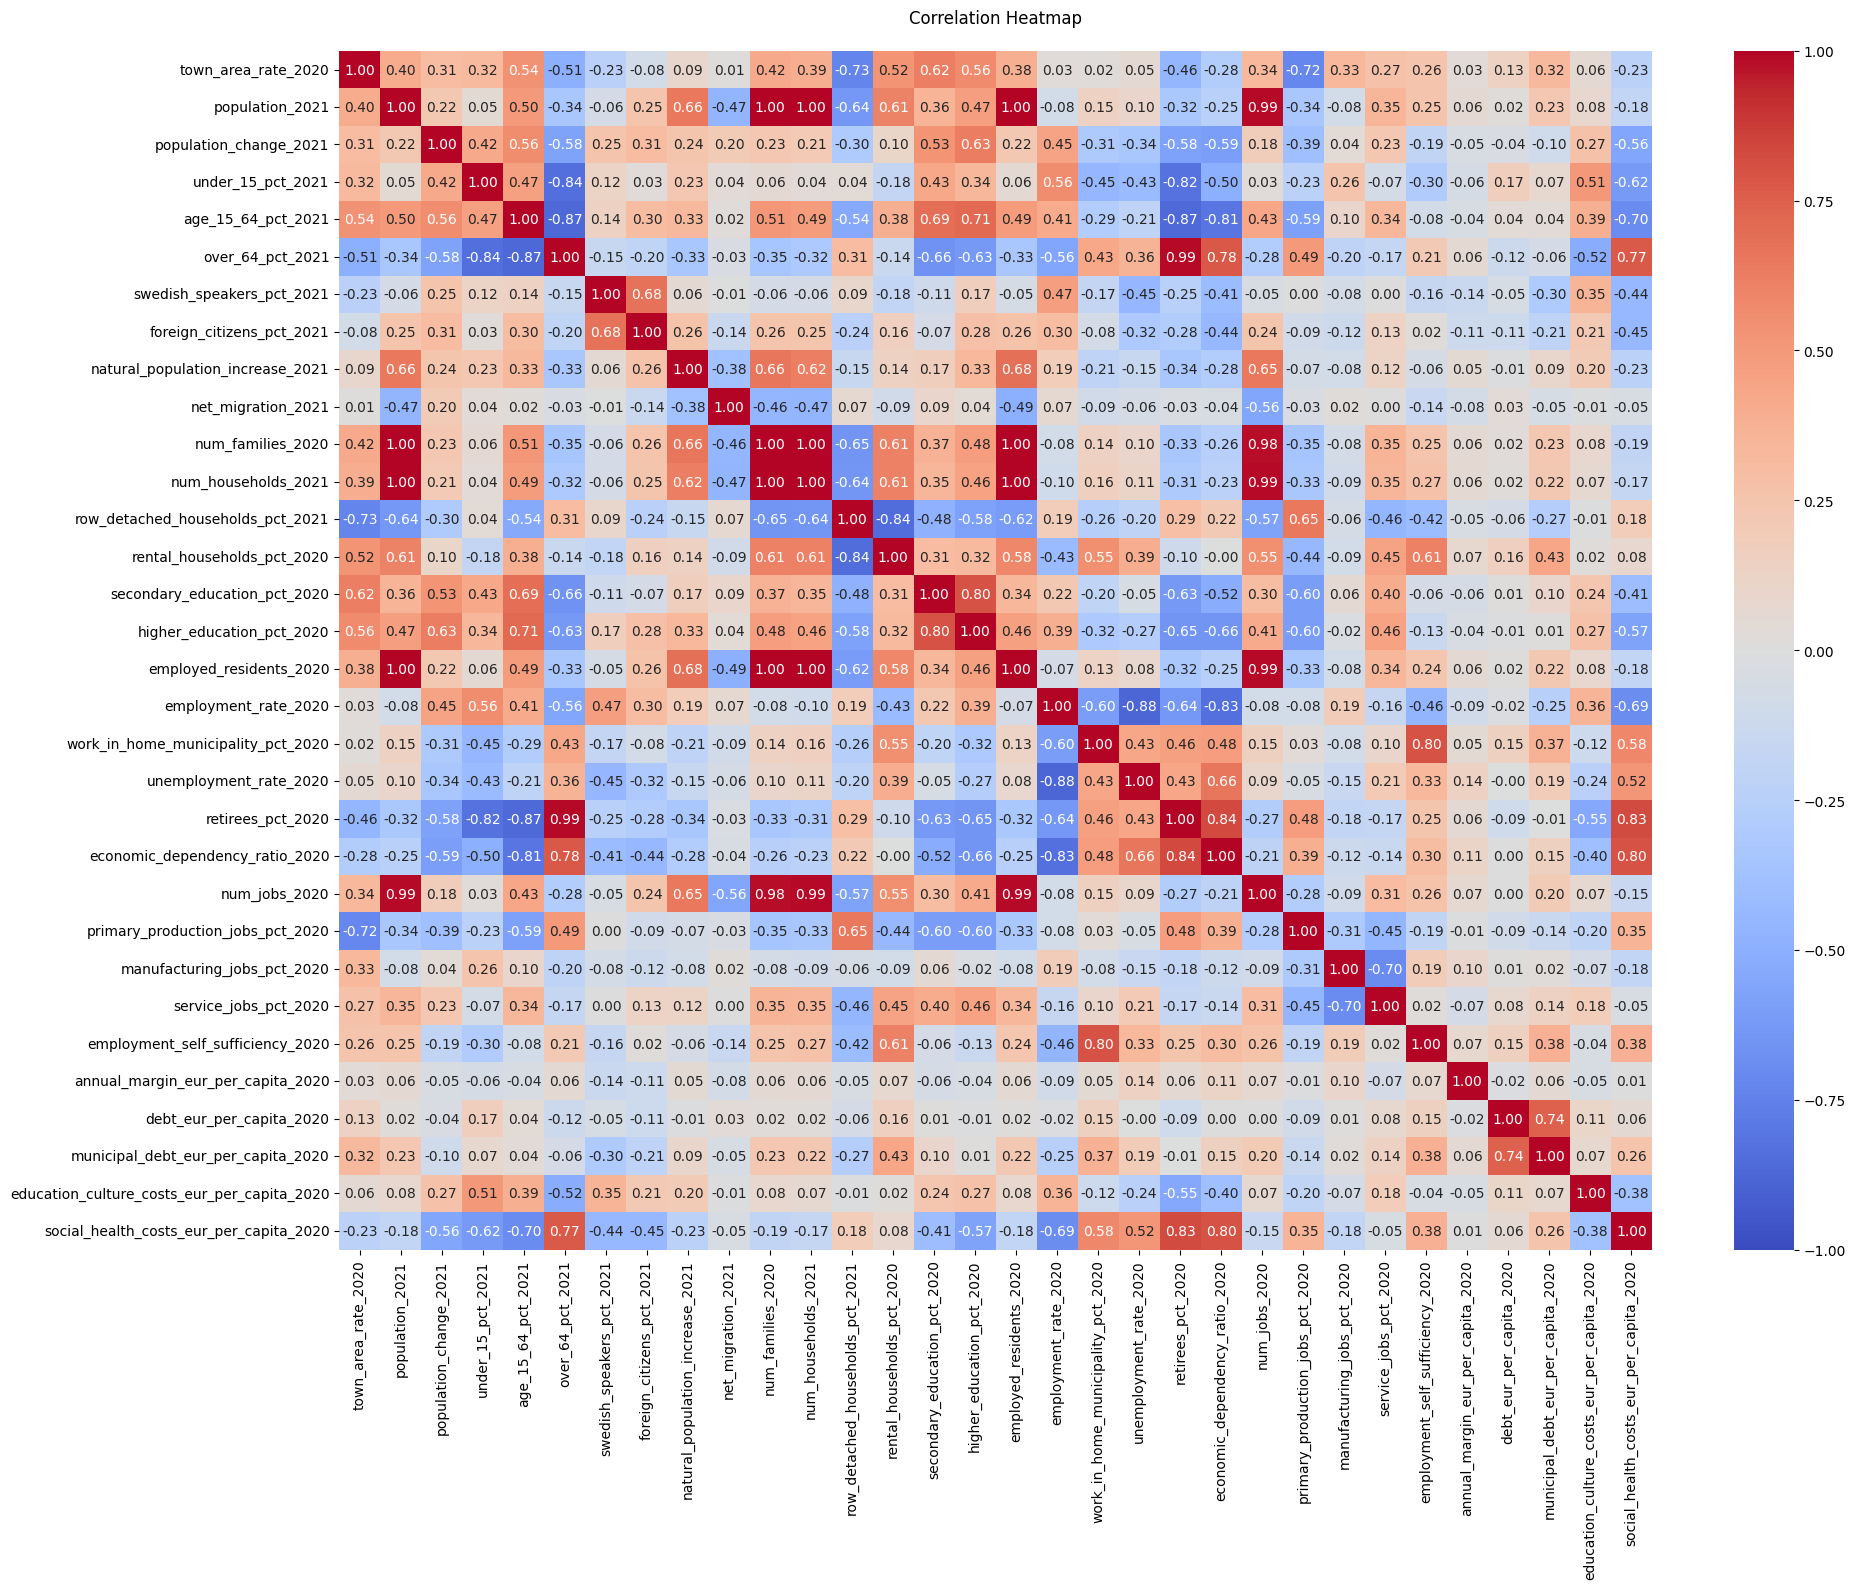

In [17]:
# correlation matrix
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap', pad=20)
plt.tight_layout()

Observations:
- Population size strongly correlatates with the number of families, the number of households, the number of employed residents and the number of jobs.
- The number of people over 64 and retirees strongly correlates with health costs per capita and with economic dependency ratio.
- The number of jobs and the number of employed residents correlates with natural population increase. And the number of employed residents strongly correlates with the number of families and the number of households.
- Work in home municipality has the inverse correlation with the employment rate.
- The number of children correlates with costs for education and culture.
- The higher education rate has opposite correlation with the number of retirees and seniors.

In [18]:
# skewness of distributions
df[numeric_cols].skew()

town_area_rate_2020                            -0.360661
population_2021                                 8.448142
population_change_2021                          0.053228
under_15_pct_2021                               0.822846
age_15_64_pct_2021                              0.359898
over_64_pct_2021                               -0.054288
swedish_speakers_pct_2021                       2.595602
foreign_citizens_pct_2021                       3.073086
natural_population_increase_2021                6.099935
net_migration_2021                             -7.802222
num_families_2020                               8.109679
num_households_2021                             8.599815
row_detached_households_pct_2021               -1.501088
rental_households_pct_2020                      1.329672
secondary_education_pct_2020                    0.140737
higher_education_pct_2020                       1.190724
employed_residents_2020                         9.046306
employment_rate_2020           

In [19]:
# kurtosis of distributions ("long-tailedness")
df[numeric_cols].kurt()

town_area_rate_2020                              0.271030
population_2021                                 92.882970
population_change_2021                           1.245998
under_15_pct_2021                                1.812417
age_15_64_pct_2021                              -0.226689
over_64_pct_2021                                -0.697790
swedish_speakers_pct_2021                        5.159122
foreign_citizens_pct_2021                       12.608535
natural_population_increase_2021                53.850499
net_migration_2021                             122.890320
num_families_2020                               86.112620
num_households_2021                             96.554406
row_detached_households_pct_2021                 1.912946
rental_households_pct_2020                       2.621672
secondary_education_pct_2020                    -0.235367
higher_education_pct_2020                        2.628002
employed_residents_2020                        104.778121
employment_rat

In [16]:
def plot_distribution(df, column, bins=50):
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(df[column], bins=bins, density=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.grid(True, alpha=0.3)

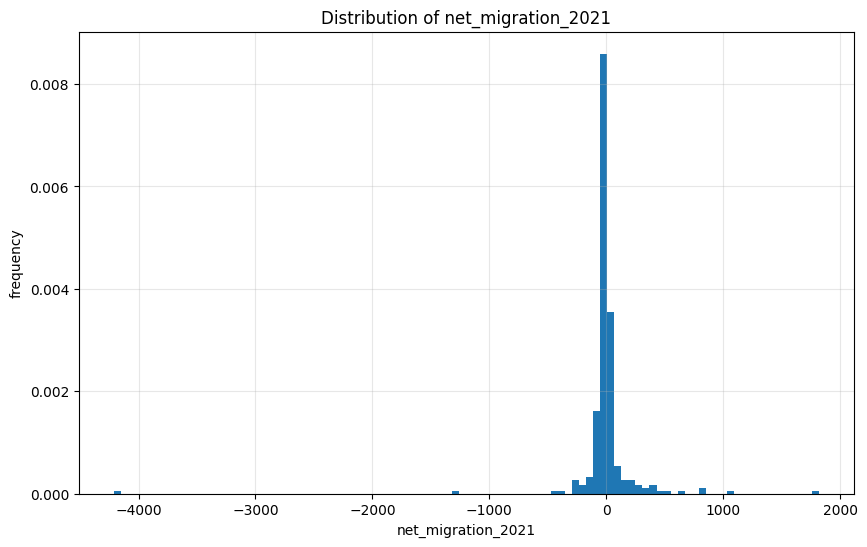

In [17]:
plot_distribution(df, 'net_migration_2021', bins=100)

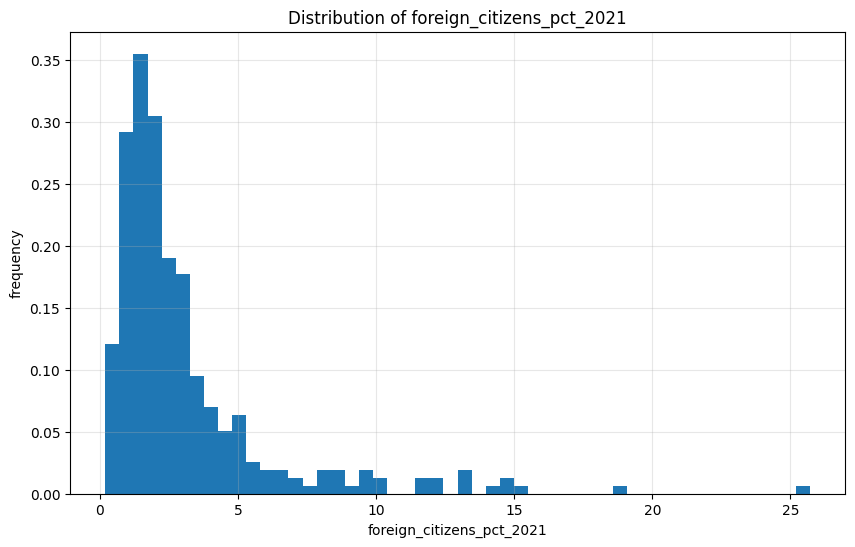

In [18]:
plot_distribution(df, 'foreign_citizens_pct_2021')

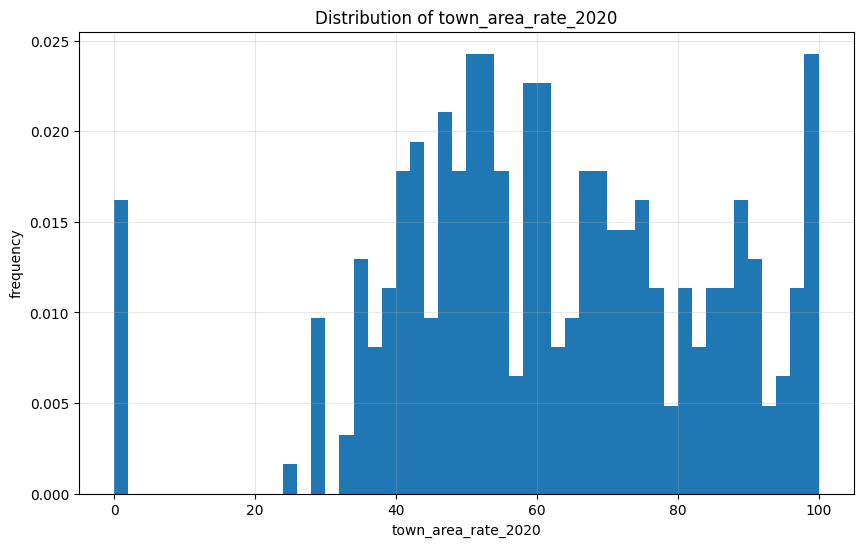

In [19]:
plot_distribution(df, 'town_area_rate_2020')

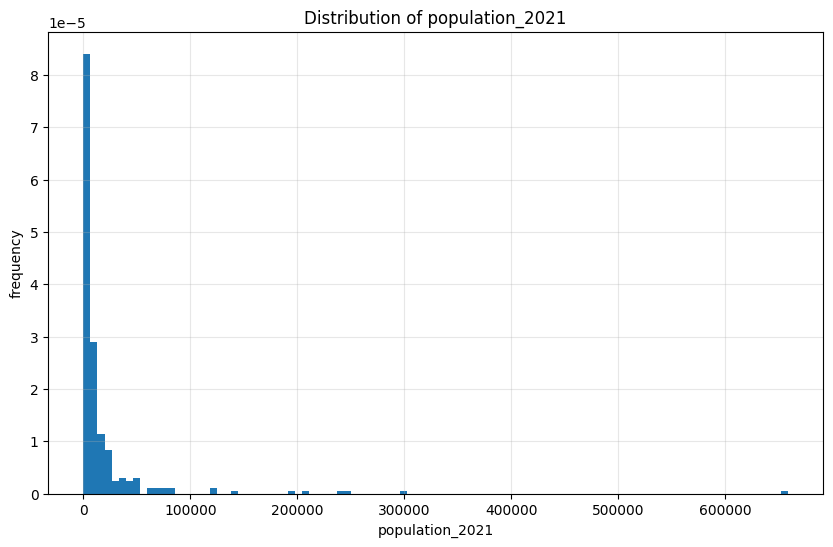

In [20]:
plot_distribution(df, 'population_2021', bins=100)

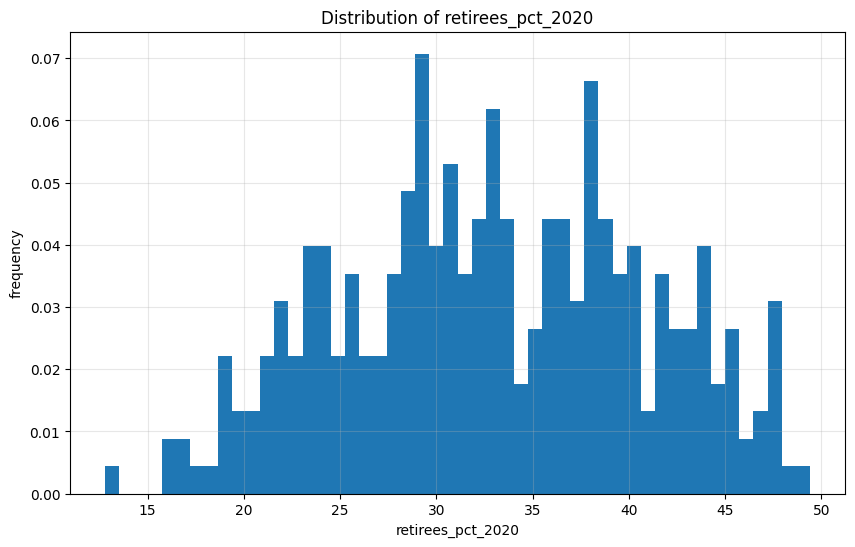

In [21]:
plot_distribution(df, 'retirees_pct_2020')